In [2]:
from data import *

Data Info

In [3]:
# check info 
print(f"Info of data: \n")
print(data.info())


Info of data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB
None


In [4]:
# check null value count
print(f"If there is any null value in any features: \n {data.isnull().sum()}")


If there is any null value in any features: 
 MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


Check Outliers

In [5]:

# summary statistics of quantitaive variables
data.describe()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


<AxesSubplot:xlabel='Horsepower'>

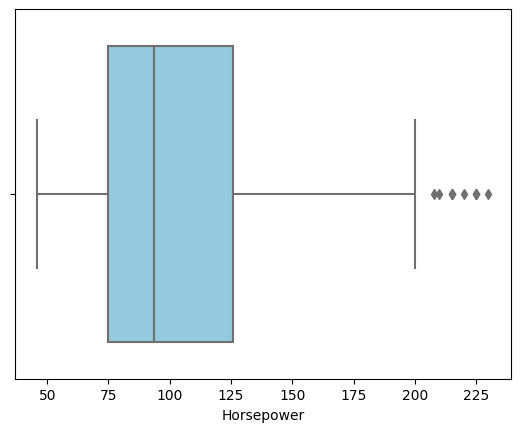

In [6]:
# box plot of horsepower
sns.boxplot(x=data['Horsepower'], color='skyblue')

In [7]:
# Filling missing values with median
median = data['Horsepower'].median()
data['Horsepower'] = data['Horsepower'].fillna(median)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [8]:
# Category distribution in categorical columns

data['Cylinders'].value_counts()/len(data)

Cylinders
4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: count, dtype: float64

In [9]:
data['Origin'].value_counts()

Origin
1    249
3     79
2     70
Name: count, dtype: int64

In [10]:
data['Model Year'].value_counts()

Model Year
73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: count, dtype: int64

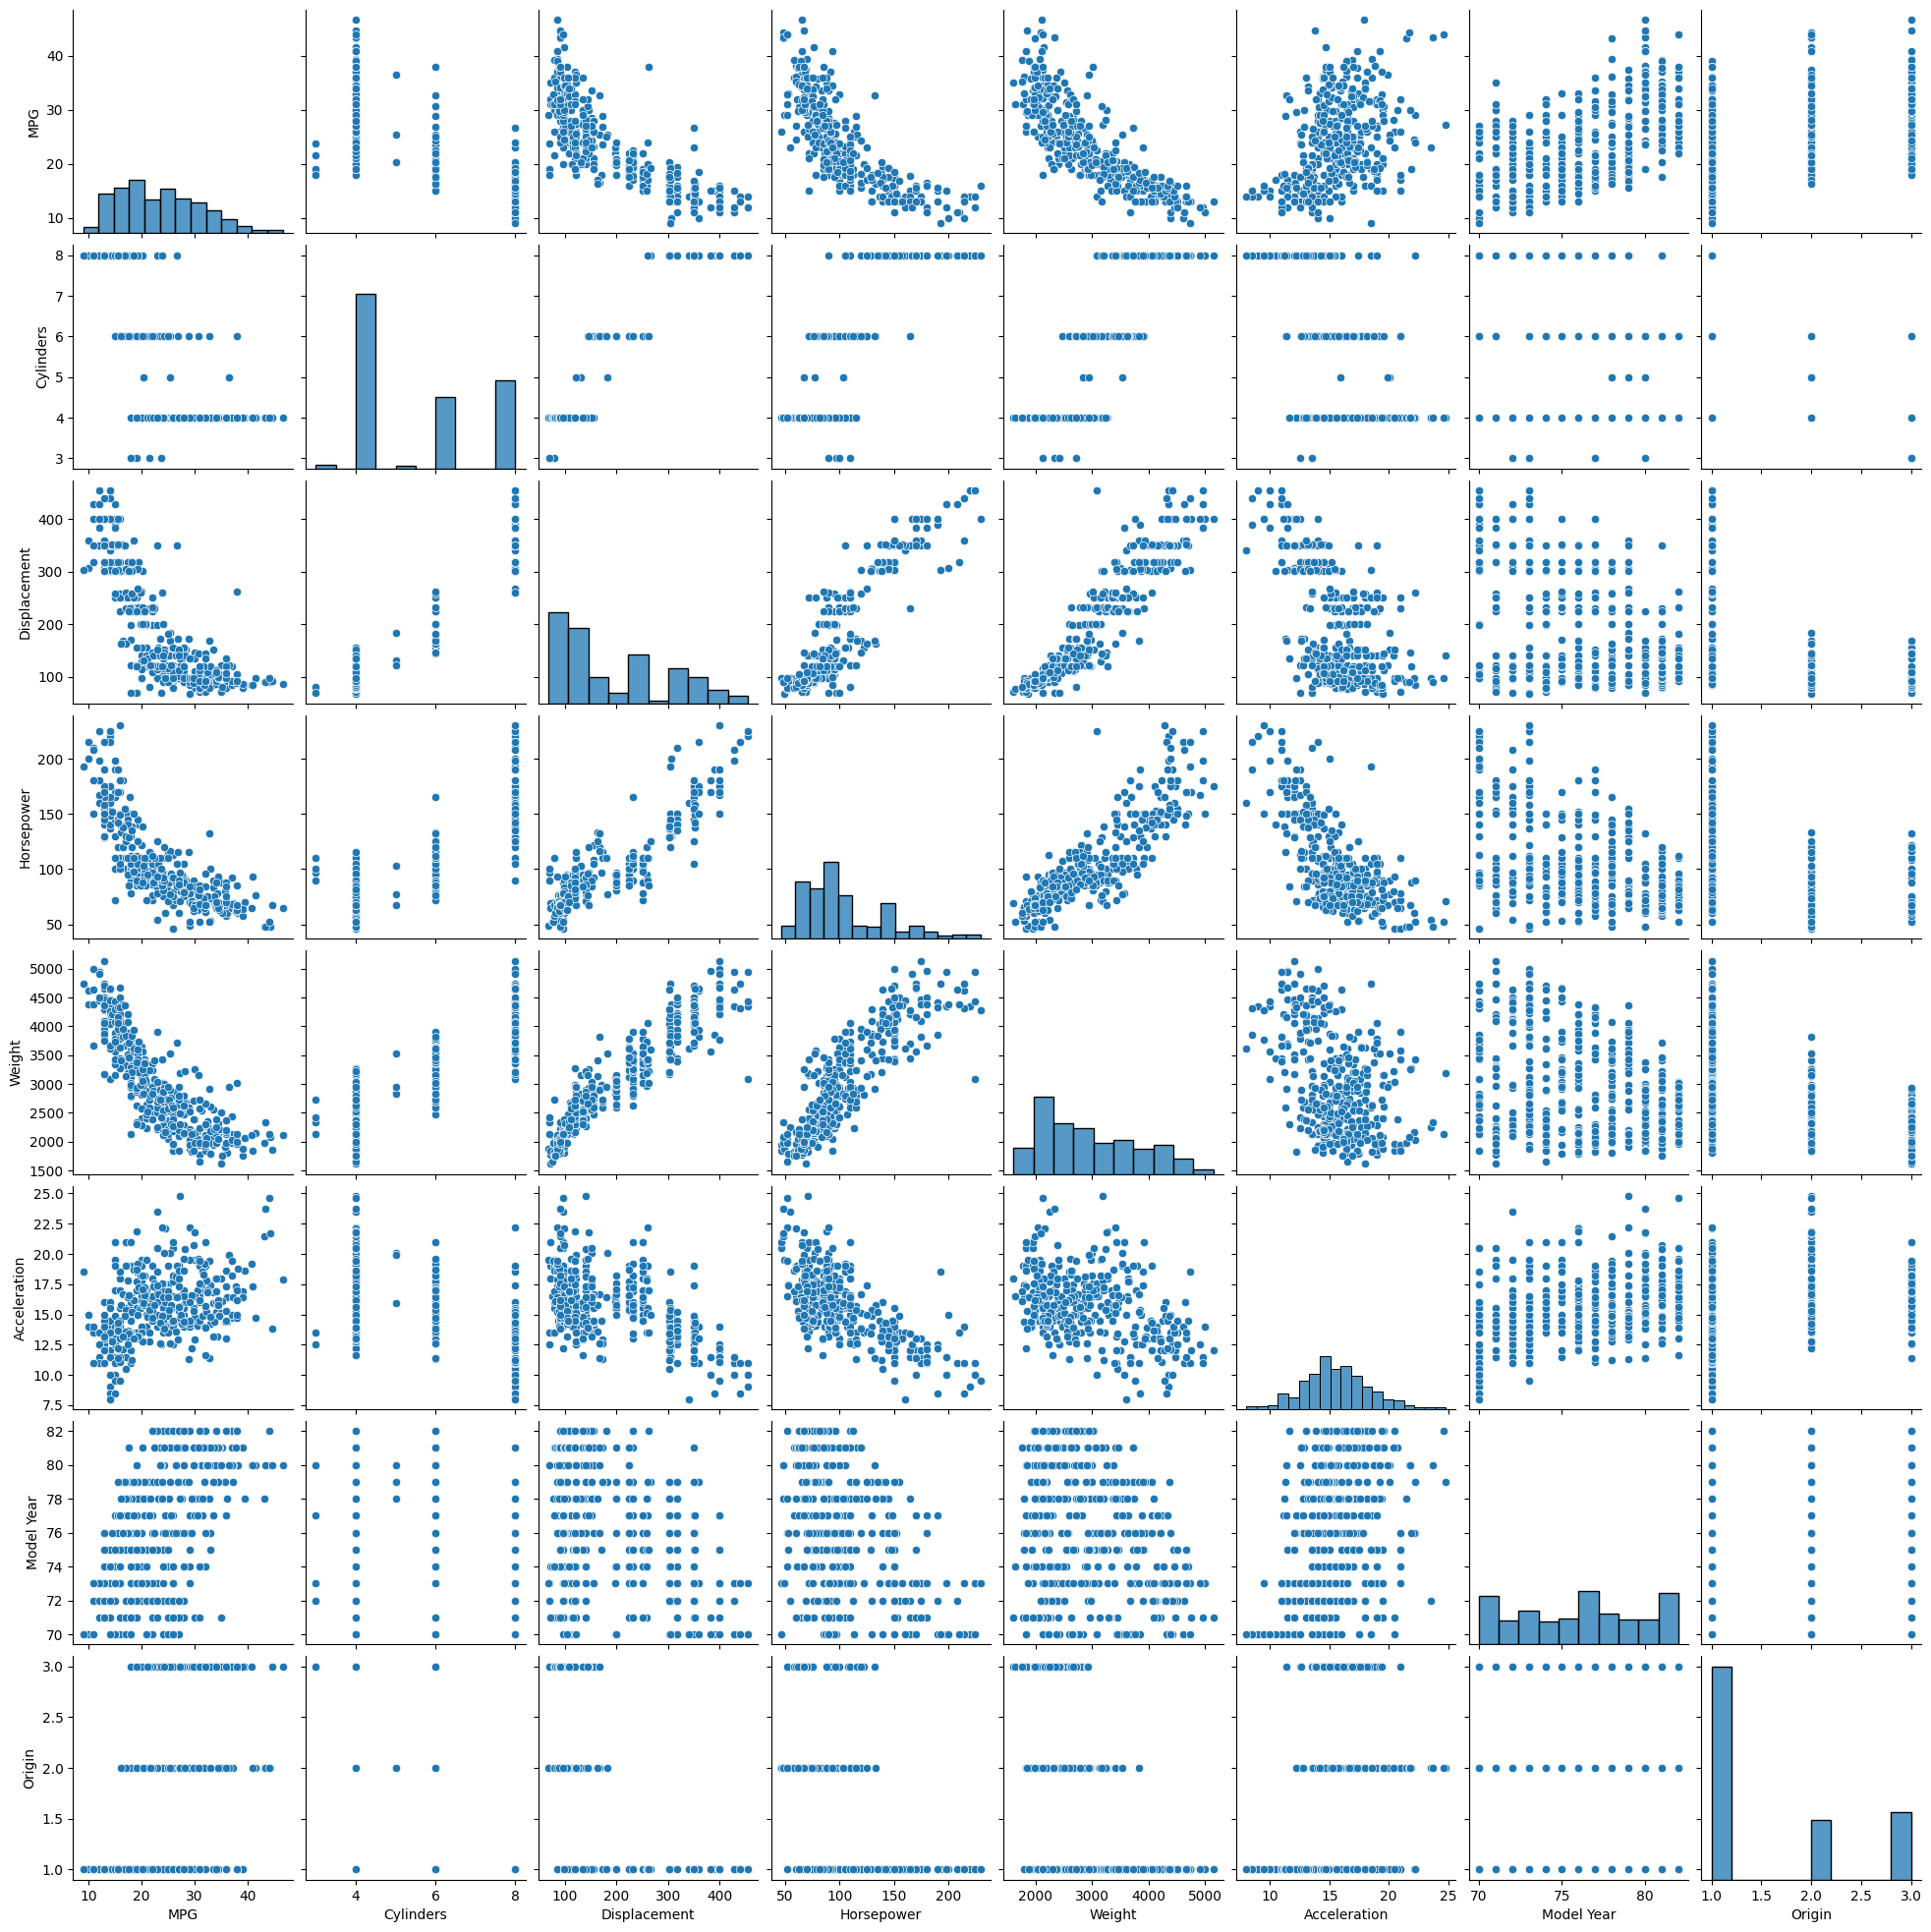

In [11]:
# Correlation plot
sns.pairplot(data[['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']])

### Conclusion
1. Displacement and Horsepower are positively correlated to each other.
2. MPG and Displacement are negatively correlated.
3. Horsepower and Weight are negatively correlated


### Analyzing the correlation of each variable with the target variable

In [12]:
## testing new variables by checking their correlation w.r.t. MPG
data['displacement_on_power'] = data['Displacement'] / data['Horsepower']
data['weight_on_cylinder'] = data['Weight'] / data['Cylinders']
data['acceleration_on_power'] = data['Acceleration'] / data['Horsepower']
data['acceleration_on_cyl'] = data['Acceleration'] / data['Cylinders']

corr_matrix = data.corr()
corr_matrix['MPG'].sort_values(ascending=False)

MPG                      1.000000
acceleration_on_cyl      0.732133
acceleration_on_power    0.704240
Model Year               0.579267
Origin                   0.563450
Acceleration             0.420289
weight_on_cylinder      -0.020778
displacement_on_power   -0.577236
Horsepower              -0.773453
Cylinders               -0.775396
Displacement            -0.804203
Weight                  -0.831741
Name: MPG, dtype: float64

acceleration_on_power and acceleration_on_cyl are two new variables which turned out to be more positively correlated than the original variables.